In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import files

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [9]:
data = pd.read_csv("student-mat.csv", sep=",")


In [10]:
print(data.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status', 'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job', 'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime', 'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class', 'extra_curr_activities', 'nursery', 'Interested_in_higher_edu', 'internet_access', 'romantic_relationship', 'Family_quality_reln', 'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum', 'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2', 'G3']


In [11]:
data.columns = data.columns.str.strip()
X = data.drop("G3", axis=1)
y = data["G3"]


In [12]:
# Identify numerical and categorical features.

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()


In [13]:
#build pipeline for preprocessing

In [14]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [15]:
dt_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
#hyperparameter tuning with GridsearchCV

param_grid = {
    "regressor__max_depth": [None, 3, 5, 7, 10],
    "regressor__min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 10}


In [18]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R2:", r2)

Test MSE: 6.65281263189969
Test R2: 0.6755524361916203


In [19]:
joblib.dump(grid_search.best_estimator_, "student_performance_model.pkl")
print("Model saved as student_performance_model.pkl")

Model saved as student_performance_model.pkl


In [20]:
files.download("student_performance_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Squared Error (MSE): 6.65281263189969
R2 Score: 0.6755524361916203


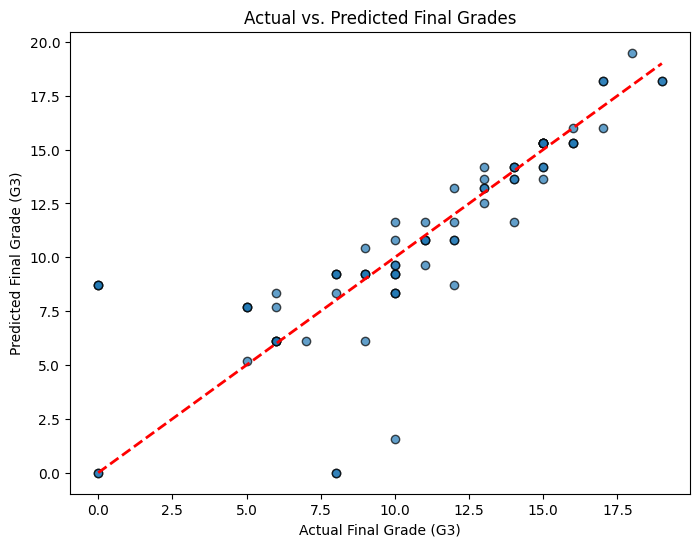

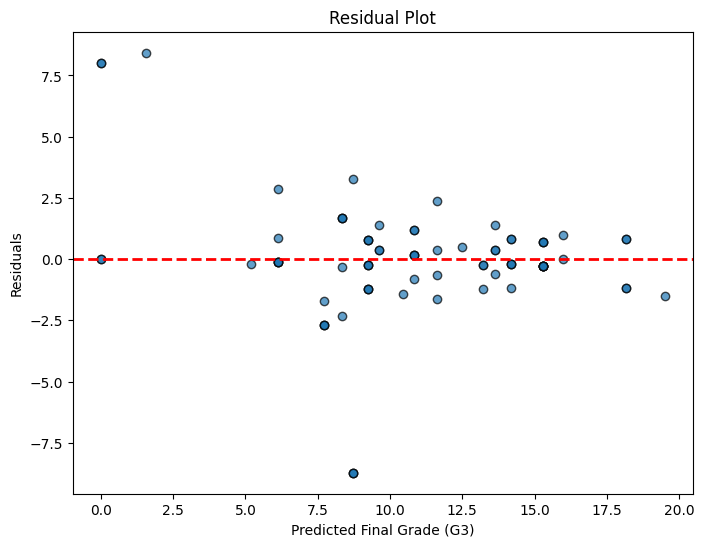

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor="k")
plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade (G3)")
plt.title("Actual vs. Predicted Final Grades")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor="k")
plt.xlabel("Predicted Final Grade (G3)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.show()
